#   DNN

#### 1. configurar y cargar datos

In [37]:
import tensorflow as tf
import os 

In [38]:
os.listdir('../../images')

['ac_milan_logo',
 'arsenal_logo',
 'atletico_madrid_logo',
 'barca_logo',
 'bayern_munich_logo',
 'benfica_logo',
 'borrusia_dormunt_logo',
 'braga_logo',
 'celtic_logo',
 'copenhagen_logo',
 'crvena_zvezda_logo',
 'feyenoord_logo',
 'galatasaray_logo',
 'inter_milan_logo',
 'lazio_logo',
 'lens_logo',
 'manchester_city_logo',
 'manchester_united_logo',
 'napoli_logo',
 'newcastle_united_logo',
 'paris_logo',
 'porto_logo',
 'psv_eindhoven_logo',
 'rb_leipzig_logo',
 'real_madrid_logo',
 'real_sociedad_logo',
 'red_bull_salzburg_logo',
 'royal_antwerp_logo',
 'sevilla_logo',
 'shakhtar_donetsk_logo',
 'union_berlin_logo',
 'young _boys_logo']

#### 2. Limpieza imagenes


In [69]:
logo_directory_path = os.path.join('../../images')
logo_files = os.listdir(logo_directory_path)
logo_files

['ac_milan_logo',
 'arsenal_logo',
 'atletico_madrid_logo',
 'barca_logo',
 'bayern_munich_logo',
 'benfica_logo',
 'borrusia_dormunt_logo',
 'braga_logo',
 'celtic_logo',
 'copenhagen_logo',
 'crvena_zvezda_logo',
 'feyenoord_logo',
 'galatasaray_logo',
 'inter_milan_logo',
 'lazio_logo',
 'lens_logo',
 'manchester_city_logo',
 'manchester_united_logo',
 'napoli_logo',
 'newcastle_united_logo',
 'paris_logo',
 'porto_logo',
 'psv_eindhoven_logo',
 'rb_leipzig_logo',
 'real_madrid_logo',
 'real_sociedad_logo',
 'red_bull_salzburg_logo',
 'royal_antwerp_logo',
 'sevilla_logo',
 'shakhtar_donetsk_logo',
 'union_berlin_logo',
 'young _boys_logo']

In [70]:
import imghdr

def prepare_image_dataset(directory_path):
    """
    Prepare the image dataset by ensuring all files are in a compatible format for TensorFlow.
    Non-image files and unsupported image formats are excluded.
    
    Args:
    directory_path (str): The path to the directory containing image files.
    
    Returns:
    list: A list of paths to valid image files.
    """
    supported_formats = {'jpeg', 'png', 'gif', 'bmp'}  # Supported image formats by TensorFlow
    valid_images = []

    # Walk through the directory and subdirectories
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            # Construct the full path to the file
            file_path = os.path.join(root, file)
            # Check the image format
            image_format = imghdr.what(file_path)
            if image_format in supported_formats:
                valid_images.append(file_path)

    return valid_images

# Run the function and get the list of valid image files
valid_image_files = prepare_image_dataset(logo_directory_path)
valid_image_files[:10]  # Display the first 10 valid image files


C:\Users\albab\AppData\Local\Temp\ipykernel_23400\773764759.py:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


['../../images\\ac_milan_logo\\-dream-league-soccer-coppa-italia-kit-juventus-f-c-football-emblem-trademark.png',
 '../../images\\ac_milan_logo\\-fC3BAtbol-inter-milan-en-jersey-comparado-con-antiguo-la-camiseta-229001655.jpg',
 '../../images\\ac_milan_logo\\01-studiomilan-imagenes-brandemia-blog.jpg',
 '../../images\\ac_milan_logo\\040ee09fecd29c809e6289af34f73dfa.png',
 '../../images\\ac_milan_logo\\0b421578eab74f9ea47e36fdc0836279.jpg',
 '../../images\\ac_milan_logo\\1024px-Escudo_ac_milan_1946.svg.png',
 '../../images\\ac_milan_logo\\1200px-FC_Internazionale_Milano_2021.svg.png',
 '../../images\\ac_milan_logo\\2021-internazionale-internacional-futbol-club-nuevo-logo-2021-diseno-2f6hyrw.jpg',
 '../../images\\ac_milan_logo\\205513_3.jpg',
 '../../images\\ac_milan_logo\\207645_3.jpg']

In [75]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Asumiendo que 'logo_directory_path' es el directorio de tus imágenes preparadas
data = tf.keras.utils.image_dataset_from_directory(
    logo_directory_path,  # Usar el directorio validado
    batch_size=32,    # Tamaño del lote de datos
    image_size=(128, 128),  # Tamaño de las imágenes (ancho, alto)
    shuffle=True,     # Mezcla los datos
    seed=123          # Semilla para la aleatorización (opcional)
)


Found 3460 files belonging to 32 classes.


In [76]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

#### 2. Cargamos los datos

In [71]:
import numpy as np
from matplotlib import pyplot as plt

In [72]:
data = tf.keras.utils.image_dataset_from_directory('../../images')

Found 3460 files belonging to 32 classes.


In [73]:
data_iterator = data.as_numpy_iterator() #esto es un iterador, Z

In [74]:
batch = data_iterator.next()

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

In [63]:
#esto es el tamaño de la imagen
batch[0].shape 

(32, 256, 256, 3)

In [64]:
batch[1] #esto es el label de cada imagen

array([25, 20, 19, 20,  2, 22, 30, 21, 25,  7, 29, 10, 15, 21,  3, 10,  0,
       29,  5, 29,  6, 23,  8, 11, 13,  9,  3, 12,  9, 24,  4, 18])

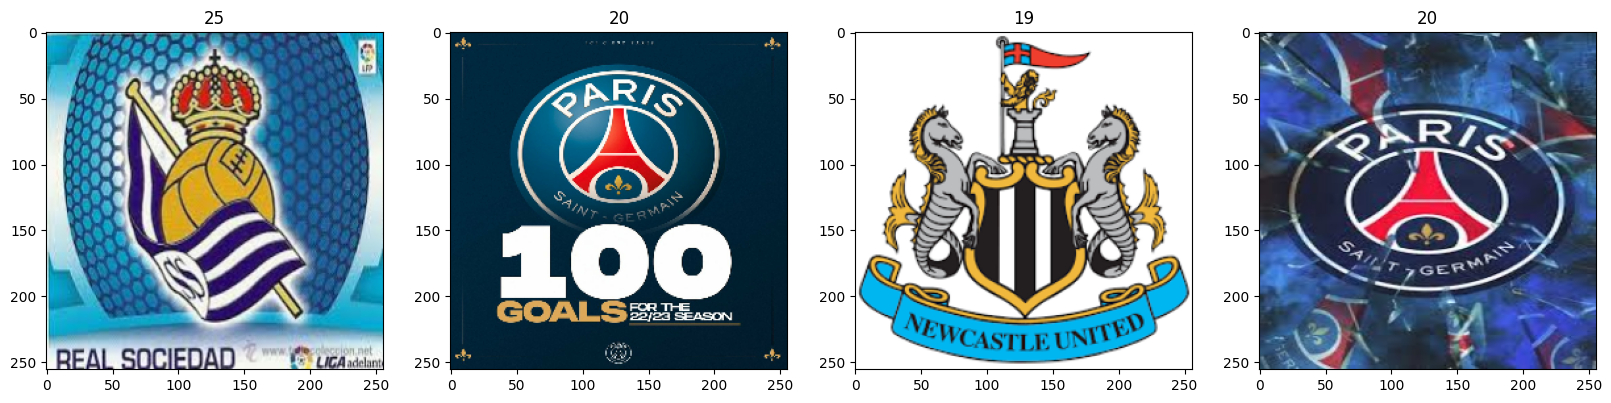

In [65]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#NOS VAMOS A APUNTAR QUE NÚMERO CORRESPONDE A CADA IMAGEN (EQUIPO)
#Class 20: Paris
#Class 25: Real Sociedad
#Class 19: Newcastle united
